In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [235]:
run script_held_out_prediction.py


Starting Parallel for 432 parameter settings
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [236]:
fitted_train_resids.reshape(6, 6, 2, len(noise_levels), -1).mean(-1).mean(2).shape
zm_fitted_test_resid.shape

................................................................................................................................................................................................................................................................

(6, 6, 2, 3, 2)

................................................................................................

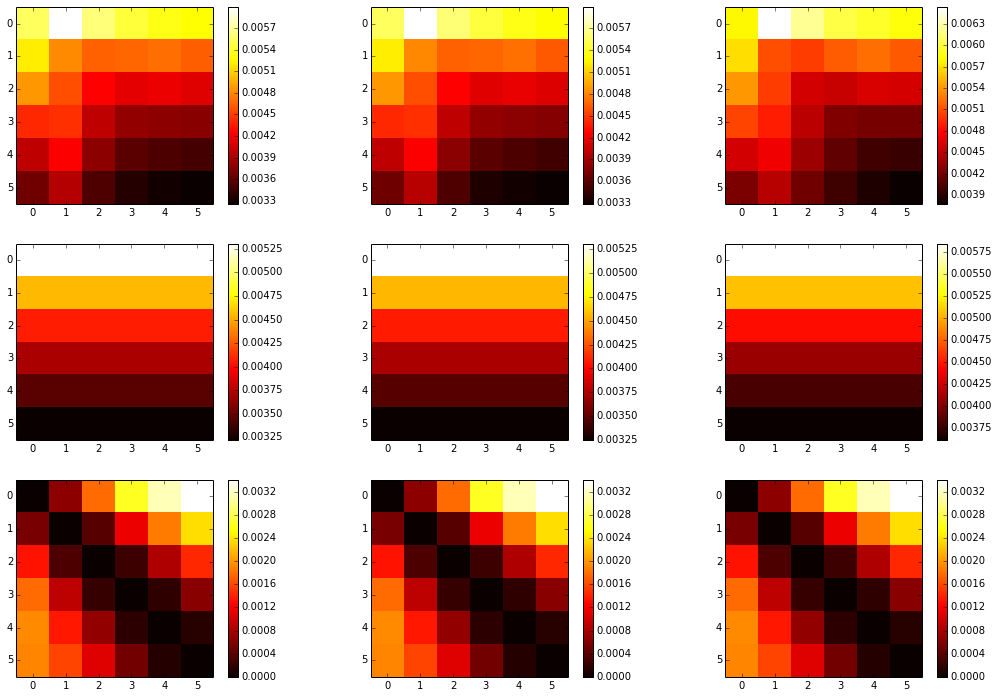

In [153]:
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(
        fitted_test_squashed_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 3)
    plt.imshow(
        zm_fitted_test_squashed_resid.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 6)
    plt.imshow(
        test_squashed_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()


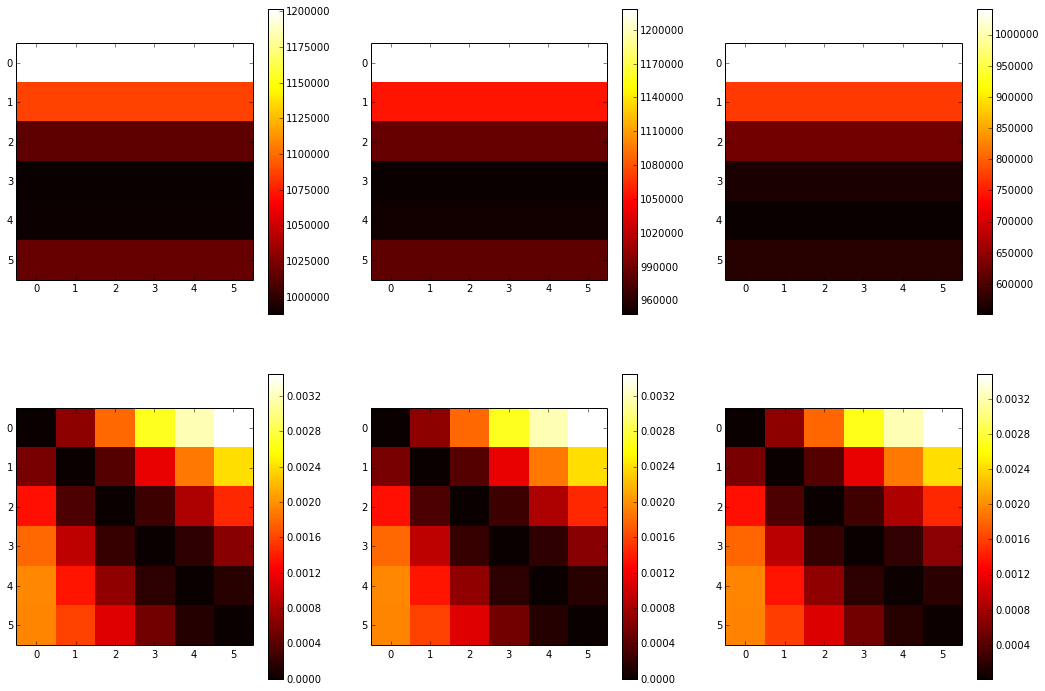

In [154]:
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(
        zm_fitted_test_resid.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(
        test_est_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()

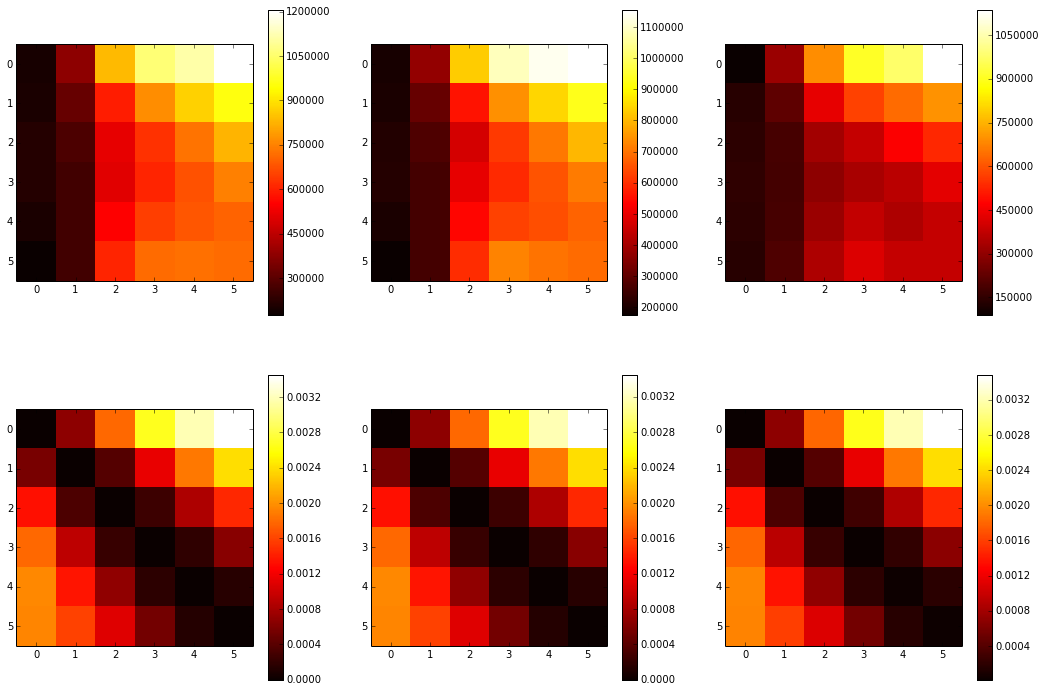

In [155]:
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(
        fitted_test_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(
        test_est_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()


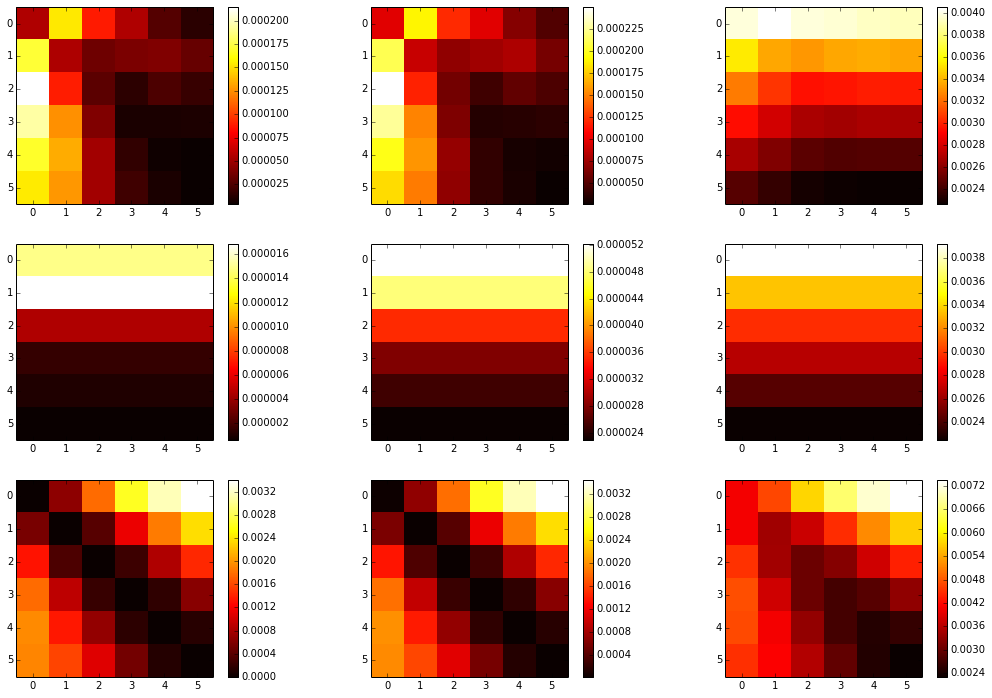

In [156]:
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(
        fitted_train_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 3)
    plt.imshow(
        zm_fitted_train_resid.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 6)
    plt.imshow(
        train_est_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()


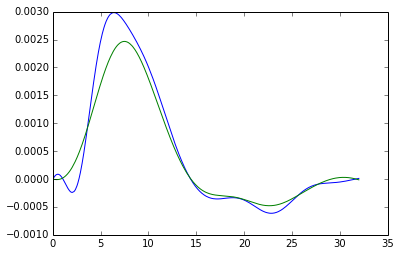

In [157]:
i, j = 5, 4
points = hrf_measurement_points[i,j,0,0,0]
hrf = hrf_measures[i,j,0,2,0]
zm_hrf = zm_hrf_measures[i,j,0,2,0]
order = np.argsort(points)
plt.plot(points[order], hrf[order])
plt.plot(points[order], zm_hrf[order])

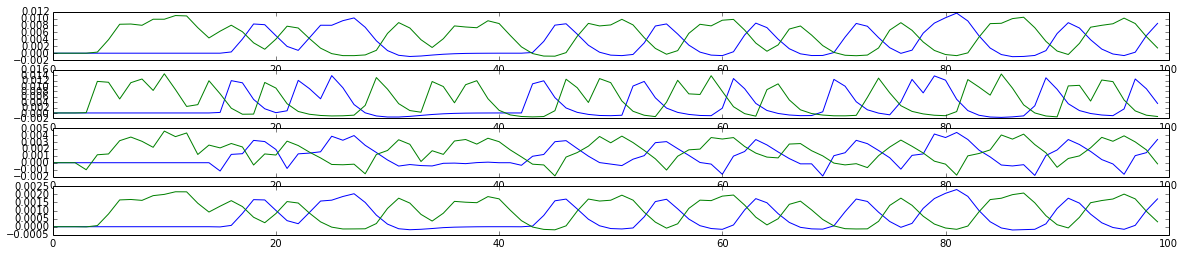

In [237]:
i, j, k = 5, 1, 1
plt.figure(figsize=(20, 4))
plt.subplot(4, 1, 1)
plt.plot(test_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0][:100])
plt.subplot(4, 1, 2)
plt.plot(test_design_est.reshape(6, 6, 2, 3, 2, -1, 2)[i, j,0,k,0][:100])
plt.subplot(4, 1, 3)
plt.plot(fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i, j,0,k,0][:100])
plt.subplot(4, 1, 4)
plt.plot(zm_fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i, j,0,0,0][:100])


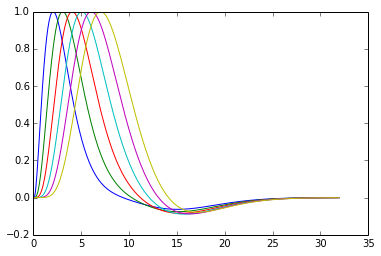

In [238]:
from nistats.hemodynamic_models import _gamma_difference_hrf
true_hrfs = np.array([_gamma_difference_hrf(1, 16., time_length=32, delay=t)
                          for t in hrf_peak_locations])
xs = np.linspace(0., 32., true_hrfs.shape[1], endpoint=False)
normed_hrfs = true_hrfs / true_hrfs.max(axis=1)[:, np.newaxis]
plt.plot(xs, normed_hrfs.T)

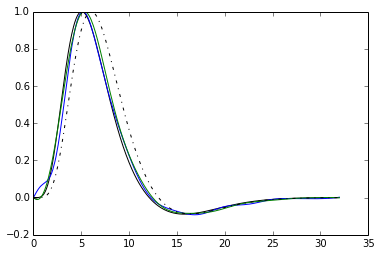

In [239]:
i, j, k = 3, 4, 0
plt.plot(xs, normed_hrfs[i], 'k')
hrf = hrf_measures[i,j,0,k,0]
plt.plot(points[order], hrf / hrf.max())
zhrf = zm_hrf_measures[i,j,0,k,0]
plt.plot(points[order], zhrf / zhrf.max())
plt.plot(xs, normed_hrfs[j], 'k-.')

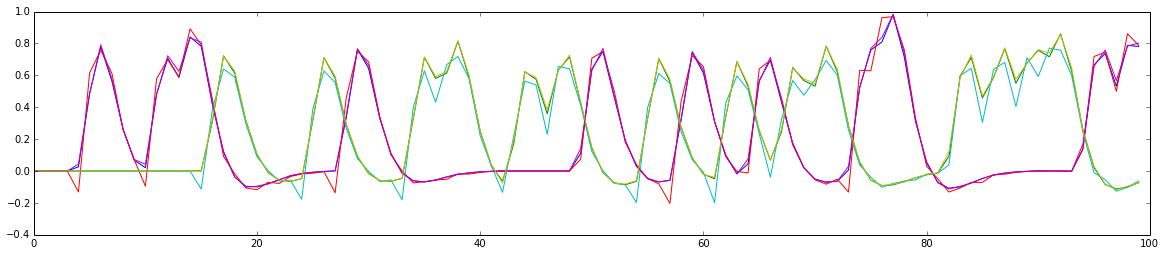

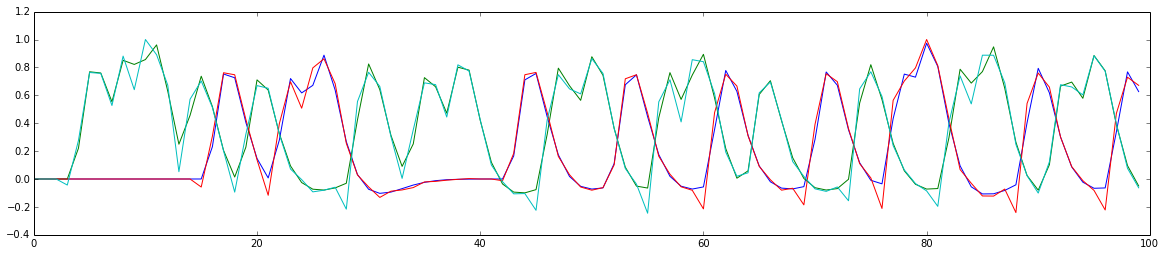

In [267]:
i, j, k = 3, 2, 0

ytr = y_train_noisy.reshape(6, 6, 2, 3, 2, -1)[i, j, 0, k, 0, :]
yt = y_test.reshape(6, 6, 2, 3, 2, -1)[i, j, 0, k, 0, :]
ytn = np.linalg.norm(yt) ** 2
ytrn = np.linalg.norm(ytr) ** 2

dtrg = train_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtre = train_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtg = test_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dte = test_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtrf = fitted_train_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtf = fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtrfz = zm_fitted_train_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtfz = zm_fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]

sdtrf = np.max(dtrf, 0) / np.max(dtrg, 0)
#dtrf = dtrf / sdtrf
#dtf = dtf / sdtrf

bg = np.linalg.pinv(dtrg).dot(ytr)
be = np.linalg.pinv(dtre).dot(ytr)
bf = np.linalg.pinv(dtrf).dot(ytr)
bfz = np.linalg.pinv(dtfz).dot(ytr)

ptrg = dtrg.dot(bg)
ptre = dtre.dot(be)
ptrf = dtrf.dot(bf)
ptrfz = dtrfz.dot(bfz)

ptg = dtg.dot(bg)
pte = dte.dot(be)
ptf = dtf.dot(bf)
ptfz = dtfz.dot(bfz)

rtrg = np.linalg.norm(ytr - ptrg) ** 2
rtre = np.linalg.norm(ytr - ptre) ** 2
rtrf = np.linalg.norm(ytr - ptrf) ** 2
rtrfz = np.linalg.norm(ytr - ptrfz) ** 2

rtg = np.linalg.norm(yt - ptg) ** 2
rte = np.linalg.norm(yt - pte) ** 2
rtf = np.linalg.norm(yt - ptf) ** 2
rtfz = np.linalg.norm(yt - ptfz) ** 2

plt.figure(figsize=(20, 4))
plt.plot(dtrg[:100] / dtrg.max(0))
plt.plot(dtrf[:100] / dtrf.max(0))
plt.plot(dtrfz[:100] / dtrfz.max(0))
plt.figure(figsize=(20, 4))
plt.plot(dtg[:100] / dtg.max(0))
plt.plot(dtf[:100] / dtf[:100].max(0))
#plt.plot(dtfz[:100] / dtfz[:100].max(0))


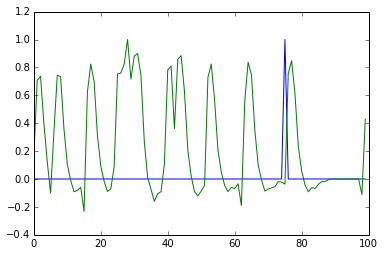

In [268]:
#plt.plot(fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0][:100])
plt.plot(dtf[100:200] / dtf[100:200].max(0))

In [252]:
(rtrg, rtre, rtrf, rtrfz),(rtg, rte, rtf, rtfz), (bg, be, bf, bfz),\
(1 - rtg  / ytn, 1 - rte  / ytn, 1 - rtf  / ytn, 1 - rtfz  / ytn),\
(1 - rtrg  / ytrn, 1 - rtre  / ytrn, 1 - rtrf  / ytrn, 1 - rtrfz  / ytrn)

((3.6550371350537029e-34,
  3.6550371350537029e-34,
  0.00012798984689076822,
  0.0033111160089925686),
 (3.7311615293303617e-34,
  3.7311615293303617e-34,
  1610.3736100032984,
  0.0032784812453708042),
 (array([ 0.49671415, -0.1382643 ]),
  array([ 0.49671415, -0.1382643 ]),
  array([ 1.25990986, -0.32073908]),
  array([  1.77880412e-04,   6.34118706e-01])),
 (1.0, 1.0, -583215.44809031999, -0.18734197777369999),
 (1.0, 1.0, 0.95392299429125404, -0.19201885895587556))

In [257]:
beta[i, j, 0,  k].reshape(2, 2)[0, :]

array([ 0.49671415, -0.1382643 ])

array([ 0.00031999])

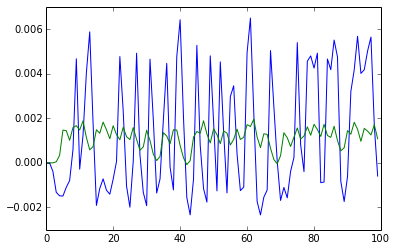

In [230]:
plt.plot(yt[:100])
plt.plot(ptf[:100])
np.correlate(yt, ptfz)

array([  1.00000000e+00,   1.00000000e-01,   2.00000000e+00,
         1.00000000e-02,   1.00000000e+01,   0.00000000e+00,
         1.00000000e+02])

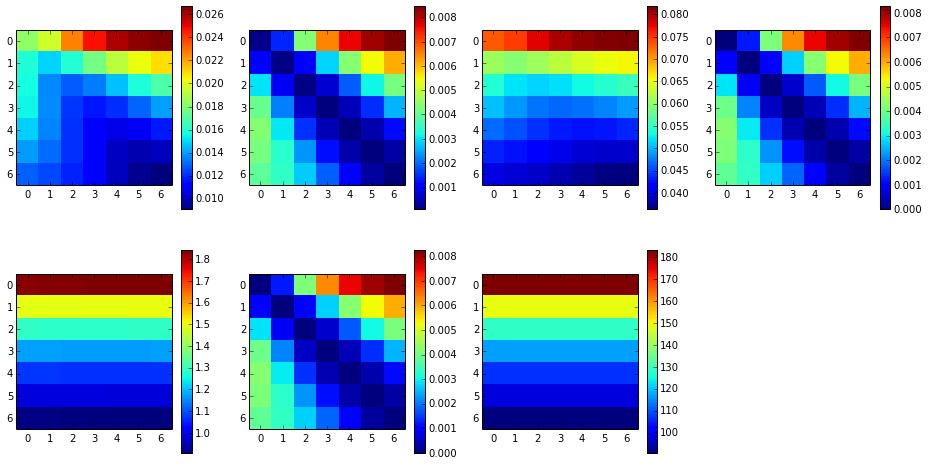

In [294]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_train_norms[..., i], interpolation='nearest')
    plt.colorbar()
noise_levels

In [295]:
train_test_norms = train_gen_test_est.reshape(7, 7, 3, 7, 4).mean(2).mean(-1)
train_gen_test_est.shape

(7, 7, 3, 28)

array([  1.00000000e+00,   1.00000000e-01,   2.00000000e+00,
         1.00000000e-02,   1.00000000e+01,   0.00000000e+00,
         1.00000000e+02])

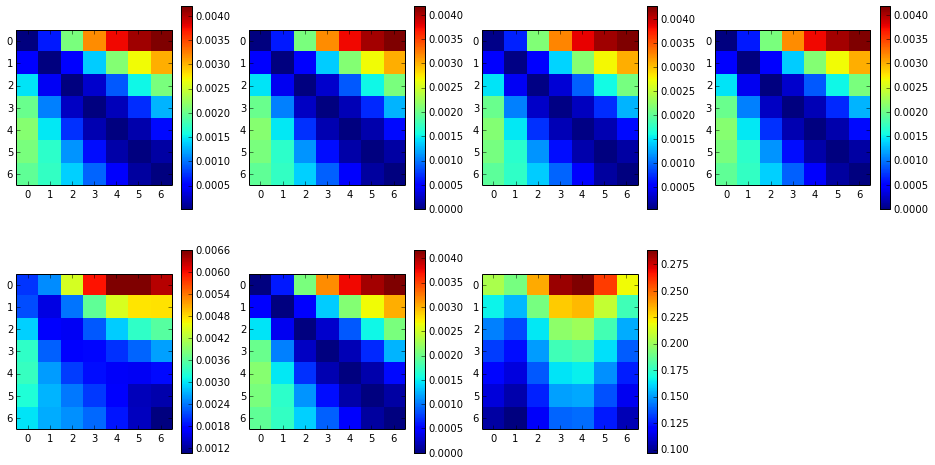

In [296]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_test_norms[..., i], interpolation='nearest')
#    plt.imshow(train_gen_test_est[:, :,0, i + 18], interpolation='nearest')

    plt.colorbar()
noise_levels


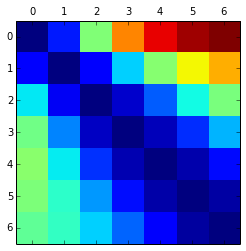

In [297]:
plt.matshow(test_est_test_est.mean(-1).mean(-1))

In [312]:
train_est_resids.shape

(7, 7, 3, 28)

In [315]:
train_test_norms = test_est_resids.reshape(7, 7, 3, 7, 4).mean(2).mean(-1)

array([  1.00000000e+00,   1.00000000e-01,   2.00000000e+00,
         1.00000000e-02,   1.00000000e+01,   0.00000000e+00,
         1.00000000e+02])

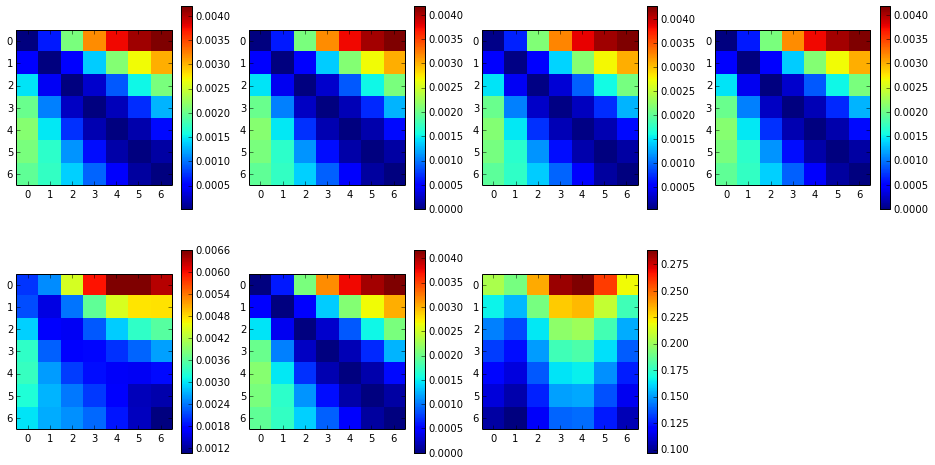

In [316]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_test_norms[..., i], interpolation='nearest')
#    plt.imshow(train_gen_test_est[:, :,0, i + 18], interpolation='nearest')

    plt.colorbar()
noise_levels


In [28]:
y_train_noisy.shape

(770, 20)

In [6]:
y_train_norms

NameError: name 'y_train_norms' is not defined

In [318]:
c_hrf_measurement_points = np.concatenate(hrf_measurement_points)
order = np.argsort(c_hrf_measurement_points)

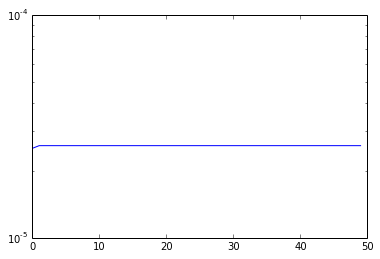

In [327]:
plt.plot((np.array(looes) ** 2).mean(1))
plt.yscale('log')

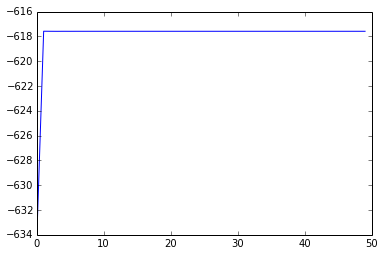

In [328]:
plt.plot(np.array(lls))

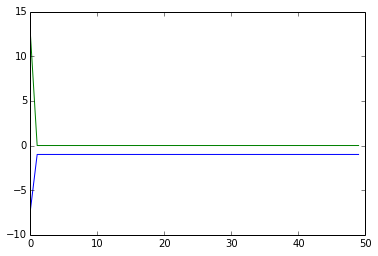

In [329]:
plt.plot(np.array(grads))

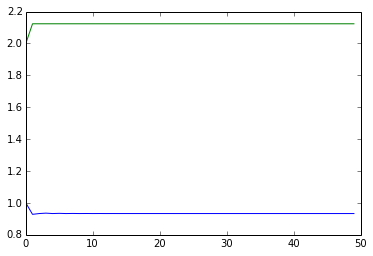

In [330]:
plt.plot(np.exp(np.array(thetas)))

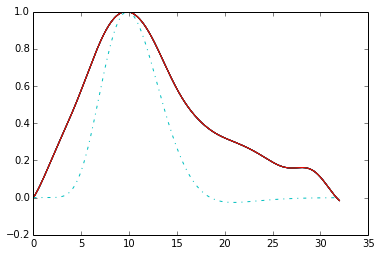

In [334]:
true_hrf = f_sim_hrf(c_hrf_measurement_points[order])
plt.plot(c_hrf_measurement_points[order], (np.array(hrfs).T[order]/ np.array(hrfs).T.max(0))[:, -10:], '-')
plt.plot(c_hrf_measurement_points[order], true_hrf / true_hrf.max(), '-.')

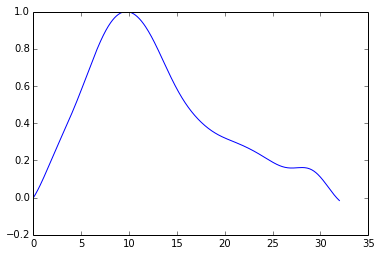

In [335]:
plt.plot(c_hrf_measurement_points[order], (np.array(hrfs).T[order])[:, -1:], '-')


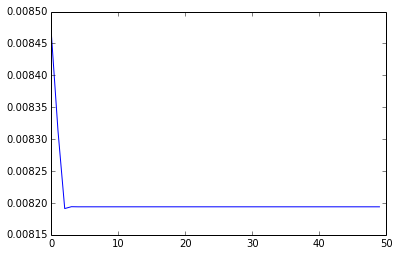

In [336]:
plt.plot(residuals)

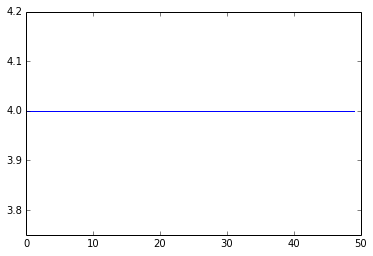

In [290]:
plt.plot(sigmas_squared)